In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
cifar10_ds = keras.datasets.cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10_ds.load_data()

In [0]:
# CIFAR100_LABELS_LIST = [
#     'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
#     'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
#     'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
#     'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
#     'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
#     'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
#     'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
#     'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#     'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
#     'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
#     'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
#     'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
#     'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
#     'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
#     'worm'
# ]

CIFAR10_LABELS_LIST = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

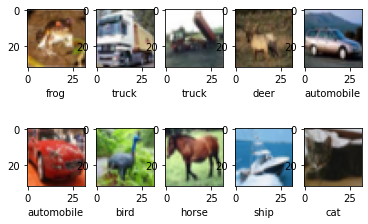

In [66]:
# For CIFAR100
# plt.figure()
# for i in range(10):
#   plt.subplot(2, 5, i+1)
#   plt.xlabel(CIFAR100_LABELS_LIST[y_train[i][0]])
#   plt.imshow(X_train[i])

# For CIFAR10
plt.figure()
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xlabel(CIFAR10_LABELS_LIST[y_train[i][0]])
  plt.imshow(X_train[i])

In [0]:
# Normalization of Data
kernel = (-1 / 256.0) * np.array(
    np.asarray([
                [1, 4, 6, 4, 1], 
                [4, 16, 24, 16, 4], 
                [6, 24, -476, 24, 6], 
                [4, 16, 24, 16, 4], 
                [1, 4, 6, 4, 1]]
               ))

for i in range(X_train.shape[0]):
    X_train[i] = cv2.filter2D(X_train[i], -1, kernel)
for i in range(X_test.shape[0]):
    X_test[i] = cv2.filter2D(X_test[i], -1, kernel)

X_train = (X_train/255).astype('float32')
X_test = (X_test/255).astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

# Sizes
n_train, n_w, n_h, n_c = X_train.shape
n_test = X_test.shape[0]

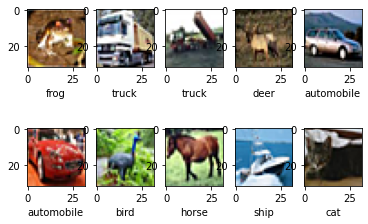

In [69]:
# For CIFAR100
# plt.figure()
# for i in range(10):
#   plt.subplot(2, 5, i+1)
#   plt.xlabel(CIFAR100_LABELS_LIST[y_train[i][0]])
#   plt.imshow(X_train[i])

# For CIFAR10
plt.figure()
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xlabel(CIFAR10_LABELS_LIST[y_train[i][0]])
  plt.imshow(X_train[i])

In [0]:
# Converting to tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [0]:
# Hyper-parameters
lr = 0.001
BATCH_SIZE = 256
SHUFFLE_SIZE = 100000

In [78]:
# Model
model = keras.Sequential()
# Conv 5*5
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3,3), padding='same', strides=(2,2), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3,3), padding='same', strides=(2,2), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, (2,2), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (2,2), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (2,2), padding='same', strides=(2,2), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(256, (2,2), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(256, (1,1), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

# For CIFAR100
# model.add(keras.layers.Dense(100))

# For CIFAR10
model.add(keras.layers.Dense(10))

optimizer = keras.optimizers.Adam(learning_rate=lr)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_147 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_148 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 15, 15, 32)        9248      
_________________________________________________________________
batch_normalization_149 (Bat (None, 15, 15, 32)        128       
_________________________________________________________________
dropout_54 (Dropout)         (None, 15, 15, 32)      

In [0]:
def calc_grad(model, X, y):
  with tf.GradientTape() as tape:
    y_pred = model(X, training=True)
    loss_val = loss(y_true=y, y_pred=y_pred)
  return loss_val, tape.gradient(loss_val, model.trainable_variables)

In [79]:
train_loss_results = []
train_acc_results = []

num_epochs = 2000

for epoch in range(num_epochs):
  epoch_loss_avg = keras.metrics.Mean()
  epoch_acc_avg = keras.metrics.SparseCategoricalAccuracy()

  for X, y in train_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE):
    loss_val, grads = calc_grad(model, X, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    epoch_loss_avg.update_state(loss_val)
    # Try with False
    epoch_acc_avg.update_state(y, model(X, training=True))

  train_loss_results.append(epoch_loss_avg.result())
  train_acc_results.append(epoch_acc_avg.result())

  test_accuracy = keras.metrics.SparseCategoricalAccuracy()
  for (X, y) in test_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE):
    # logits = model(X, training=False)
    # preds = tf.nn.softmax(logits)
    # prediction = tf.argmax(preds, axis=1, output_type=tf.int32)
    # test_accuracy(prediction, y)
    test_accuracy.update_state(y, model(X, training=False))
  print("Epoch {:03d}: Loss: {:.3f}, Train Accuracy: {:.3%}, Test Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_acc_avg.result(), test_accuracy.result()))


Epoch 000: Loss: 2.054, Train Accuracy: 27.912%, Test Accuracy: 24.160%
Epoch 001: Loss: 1.531, Train Accuracy: 44.068%, Test Accuracy: 50.220%
Epoch 002: Loss: 1.313, Train Accuracy: 53.414%, Test Accuracy: 57.830%
Epoch 003: Loss: 1.159, Train Accuracy: 59.420%, Test Accuracy: 60.740%
Epoch 004: Loss: 1.029, Train Accuracy: 64.108%, Test Accuracy: 63.780%
Epoch 005: Loss: 0.937, Train Accuracy: 67.638%, Test Accuracy: 66.860%
Epoch 006: Loss: 0.866, Train Accuracy: 70.550%, Test Accuracy: 66.610%
Epoch 007: Loss: 0.790, Train Accuracy: 73.098%, Test Accuracy: 69.290%
Epoch 008: Loss: 0.731, Train Accuracy: 75.204%, Test Accuracy: 72.230%
Epoch 009: Loss: 0.690, Train Accuracy: 77.184%, Test Accuracy: 73.440%
Epoch 010: Loss: 0.641, Train Accuracy: 78.768%, Test Accuracy: 73.400%
Epoch 011: Loss: 0.604, Train Accuracy: 80.144%, Test Accuracy: 75.550%
Epoch 012: Loss: 0.577, Train Accuracy: 81.090%, Test Accuracy: 75.870%
Epoch 013: Loss: 0.544, Train Accuracy: 82.200%, Test Accuracy: 

KeyboardInterrupt: ignored

#### Above error is caused by manual interruption of epochs. The Loss is saturated after 65 epochs.

In [80]:
test_accuracy = keras.metrics.Accuracy()
for (X, y) in test_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE):
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(X, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)  
  test_accuracy(prediction, y)

print("Test accuracy: {}".format(test_accuracy.result()))

Test accuracy: 0.8389000296592712
